Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [15]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
import random
from IPython.display import display, Image
from scipy import ndimage
from skimage.measure import compare_ssim as ssim
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [1]:
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '/home/weirgetic/Downloads/GitHub Repositories/Deep Learning' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

NameError: global name 'os' is not defined

Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labelled A through J.

In [3]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

NameError: name 'train_filename' is not defined

---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [4]:
root = '/home/weirgetic'
train_folders = ['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']
test_folders = ['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 'notMNIST_small/I', 'notMNIST_small/J']
train_folders = [os.path.join(root,t) for t in train_folders]
test_folders = [os.path.join(root,t) for t in test_folders]
def displayRandImg(folders) :
    for folder in folders : 
        path = os.path.join(folder  , random.choice(os.listdir(folder)))
        print(folder)
        display(Image(filename= path))
            
displayRandImg(train_folders)
displayRandImg(test_folders)

/home/weirgetic/notMNIST_large/A


/home/weirgetic/notMNIST_large/B


/home/weirgetic/notMNIST_large/C


/home/weirgetic/notMNIST_large/D


/home/weirgetic/notMNIST_large/E


/home/weirgetic/notMNIST_large/F


/home/weirgetic/notMNIST_large/G


/home/weirgetic/notMNIST_large/H


/home/weirgetic/notMNIST_large/I


/home/weirgetic/notMNIST_large/J


/home/weirgetic/notMNIST_small/A


/home/weirgetic/notMNIST_small/B


/home/weirgetic/notMNIST_small/C


/home/weirgetic/notMNIST_small/D


/home/weirgetic/notMNIST_small/E


/home/weirgetic/notMNIST_small/F


/home/weirgetic/notMNIST_small/G


/home/weirgetic/notMNIST_small/H


/home/weirgetic/notMNIST_small/I


/home/weirgetic/notMNIST_small/J


Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [9]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)

  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

/home/weirgetic/notMNIST_large/A.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_large/B.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_large/C.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_large/D.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_large/E.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_large/F.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_large/G.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_large/H.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_large/I.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_large/J.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_small/A.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_small/B.pickle already present - Skipping pickling.
/home/weirgetic/notMNIST_small/C.pickle already present - Skipping pickling.

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

In [79]:
def displayRawImg(pickles_folder) :
    for i,ds in enumerate(pickles_folder) :
        with open(ds, 'rb') as f:
            dataset = pickle.load(f)
            plt.subplot(4,3,1+i)
            plt.axis('off')
            plt.imshow(random.choice(dataset))

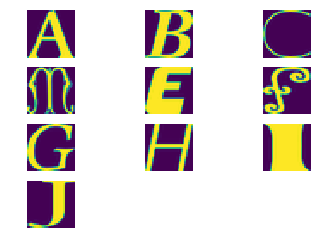

In [80]:
displayRawImg(train_datasets)

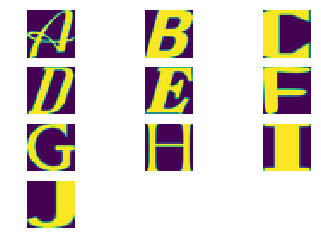

In [81]:
displayRawImg(test_datasets)

---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [86]:
def balancingCheck(pickles_folder) :
    tmpList = None
    for i,ds in enumerate(pickles_folder) :
        with open(ds, 'rb') as f:
            dataset = pickle.load(f)
        print("number of images in %s is equal to %s" % (ds,len(dataset)))

In [87]:
balancingCheck(train_datasets)

number of images in /home/weirgetic/notMNIST_large/A.pickle is equal to 52909
number of images in /home/weirgetic/notMNIST_large/B.pickle is equal to 52911
number of images in /home/weirgetic/notMNIST_large/C.pickle is equal to 52912
number of images in /home/weirgetic/notMNIST_large/D.pickle is equal to 52911
number of images in /home/weirgetic/notMNIST_large/E.pickle is equal to 52912
number of images in /home/weirgetic/notMNIST_large/F.pickle is equal to 52912
number of images in /home/weirgetic/notMNIST_large/G.pickle is equal to 52912
number of images in /home/weirgetic/notMNIST_large/H.pickle is equal to 52912
number of images in /home/weirgetic/notMNIST_large/I.pickle is equal to 52912
number of images in /home/weirgetic/notMNIST_large/J.pickle is equal to 52911


In [88]:
balancingCheck(test_datasets)

number of images in /home/weirgetic/notMNIST_small/A.pickle is equal to 1872
number of images in /home/weirgetic/notMNIST_small/B.pickle is equal to 1873
number of images in /home/weirgetic/notMNIST_small/C.pickle is equal to 1873
number of images in /home/weirgetic/notMNIST_small/D.pickle is equal to 1873
number of images in /home/weirgetic/notMNIST_small/E.pickle is equal to 1873
number of images in /home/weirgetic/notMNIST_small/F.pickle is equal to 1872
number of images in /home/weirgetic/notMNIST_small/G.pickle is equal to 1872
number of images in /home/weirgetic/notMNIST_small/H.pickle is equal to 1872
number of images in /home/weirgetic/notMNIST_small/I.pickle is equal to 1872
number of images in /home/weirgetic/notMNIST_small/J.pickle is equal to 1872


Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [10]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [11]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

In [20]:
label_marks = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}
def displayImgArrays(dataset,dataset_labels) :
    samples = np.random.randint(len(dataset),size=10)
    for i,sample in enumerate(samples) :
        plt.subplot(4,3,1+i)
        plt.axis('off')
        plt.title(label_marks[dataset_labels[sample]])
        plt.imshow(dataset[sample])

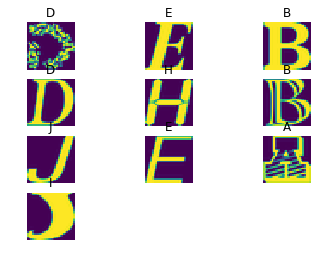

In [109]:
displayImgArrays(train_dataset,train_labels)

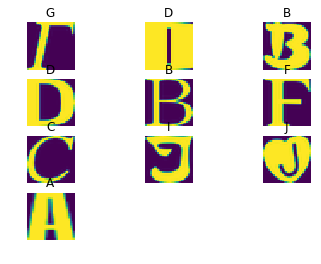

In [107]:
displayImgArrays(test_dataset,test_labels)

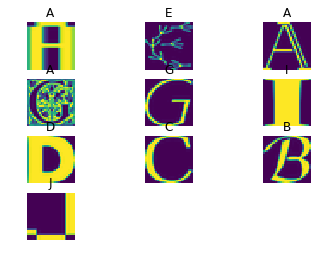

In [110]:
displayImgArrays(valid_dataset,valid_labels)

Finally, let's save the data for later reuse:

In [96]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [0]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 718193801


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [234]:
def displayIdenticalImgs(dataset) :
    for i,sample in enumerate(dataset) :
        plt.subplot(4,3,1+i)
        plt.axis('off')
        plt.imshow(sample)

I used Structural Similarity Index ([SSIM](http://www.pyimagesearch.com/2014/09/15/python-compare-two-images/)) for comparing different images in the dataset :

In [225]:
def overlapping_measure(dataset_1,dataset_2) :
    similarity_score = 0.0
    similar_images = {}
    similar_imgs_index_2 = []
    for i,m_1 in enumerate(dataset_1) : 
        for j,m_2 in enumerate(dataset_2) :
            if (ssim(m_1,m_2) > .85) : 
                if j not in similar_imgs_index_2 :
                    similarity_score += 1
                    similar_imgs_index_2.append(j)
                if i not in similar_images.keys() :
                    similar_images[i] = []
                    similarity_score += 1
                similar_images[i].append(m_2)
    # calculating the overlapping Score
    overlapping_score = similarity_score / (dataset_1.shape[0] + dataset_2.shape[0])
    return (similar_images,similar_imgs_index_2,overlapping_score)

I couldn't run this algorithm on full data, because of weak hardware .
If you want to run this on full data , u should just inject full data to the functions.

In [230]:
# remove restrictions on dataset if u want to find overlapping data on all elements of datasets
%time train_test_similar_imgs,test_train_similar_indexes,train_test_overlapping_score = overlapping_measure(train_dataset[:1000],test_dataset[:1000])
print("train & test dataset Overlapping Percent : %f" % train_test_overlapping_score)

CPU times: user 4min 42s, sys: 0 ns, total: 4min 42s
Wall time: 4min 42s
train & test dataset Overlapping Percent : 0.081000


Displaying a sample of images which are almost identical between train & test dataset :

train & test dataset Overlapping Images : 


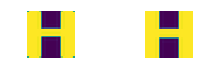

In [239]:
sample = random.choice(train_test_similar_imgs.keys())
print("train & test dataset Overlapping Images : ")
displayIdenticalImgs(np.append([train_dataset[sample]],train_test_similar_imgs[sample],axis=0))

In [231]:
# remove restrictions on dataset if u want to find overlapping data on all elements of datasets
%time train_valid_similar_imgs,valid_train_similar_indexes,train_valid_overlapping_score = overlapping_measure(train_dataset[:1000],valid_dataset[:1000])
print("train & validation dataset Overlapping Percent : %f" % train_valid_overlapping_score)

CPU times: user 4min 39s, sys: 0 ns, total: 4min 39s
Wall time: 4min 39s
train & validation dataset Overlapping Percent : 0.057500


Displaying a sample of images which are almost identical between train & validation dataset :

train & validation dataset Overlapping Images : 


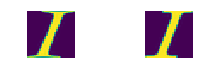

In [244]:
sample = random.choice(train_valid_similar_imgs.keys())
print("train & validation dataset Overlapping Images : ")
displayIdenticalImgs(np.append([train_dataset[sample]],train_valid_similar_imgs[sample],axis=0))

In [232]:
# remove restrictions on dataset if u want to find overlapping data on all elements of datasets
%time valid_test_similar_imgs,test_valid_similar_indexes,valid_test_overlapping_score = overlapping_measure(valid_dataset[:1000],test_dataset[:1000])
print("test & validation dataset Overlapping Percent : %f" % valid_test_overlapping_score)

CPU times: user 4min 52s, sys: 0 ns, total: 4min 52s
Wall time: 4min 52s
test & validation dataset Overlapping Percent : 0.067500


Displaying a sample of images which are almost identical between validation & test dataset :

Validation & test dataset Overlapping Images : 


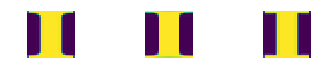

In [247]:
sample = random.choice(valid_test_similar_imgs.keys())
print("Validation & test dataset Overlapping Images : ")
displayIdenticalImgs(np.append([valid_dataset[sample]],valid_test_similar_imgs[sample],axis=0))

Sanitizing validation dataset & labels :

In [271]:
print("Number of removed items from validation dataset : %i" % len(valid_train_similar_indexes))
sanitized_valid_dataset = np.delete(valid_dataset,valid_train_similar_indexes,axis=0)
sanitized_valid_labels = np.delete(valid_labels,valid_train_similar_indexes,axis=0)

Number of removed items from validation dataset : 56


Sanitizing test dataset & labels :

In [272]:
removable_test_datas = list(set(test_valid_similar_indexes + test_train_similar_indexes))
print("Number of removed items from test dataset : %i" % len(removable_test_datas))
sanitized_test_dataset = np.delete(test_dataset,removable_test_datas,axis=0)
sanitized_test_labels = np.delete(test_labels,removable_test_datas,axis=0)

Number of removed items from test dataset : 117


Saving sanitized datasets on a pickle file : 

In [275]:
data_root = '/home/weirgetic/Downloads/GitHub Repositories/Deep Learning'

sanitized_pickle_file = os.path.join(data_root, 'sanitized_notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': sanitized_valid_dataset,
    'valid_labels': sanitized_valid_labels,
    'test_dataset': sanitized_test_dataset,
    'test_labels': sanitized_test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [276]:
statinfo = os.stat(sanitized_pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690257221


I couldn't sanitize all datasets ,so i didn't use this sanitized datasets in my subsequent assignments.

---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

First i loaded the datasets :

In [4]:
pickle_file = '/home/weirgetic/notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


I reformated every image to an 1-D array (Dimensionality Reduction) :

In [11]:
image_size = 28

def reformat(dataset):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  return dataset
train_dataset = reformat(train_dataset)
valid_dataset = reformat(valid_dataset)
test_dataset = reformat(test_dataset)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000,)
Validation set (10000, 784) (10000,)
Test set (10000, 784) (10000,)


A method for training and testing the logistic regression via sklearn library : 

In [18]:
def logistic_score(train_dataset,train_labels,test_dataset,test_labels,data_num) :
    logistic = LogisticRegression()
    %time logistic.fit(train_dataset[:data_num], train_labels[:data_num])
    print('LogisticRegression score: %f'
          % logistic.score(test_dataset, test_labels))

Training on 50 training samples :

In [19]:
logistic_score(train_dataset,train_labels,test_dataset,test_labels,50)

CPU times: user 56 ms, sys: 0 ns, total: 56 ms
Wall time: 53 ms
LogisticRegression score: 0.536000


Training on 100 training samples :

In [21]:
logistic_score(train_dataset,train_labels,test_dataset,test_labels,100)

CPU times: user 112 ms, sys: 0 ns, total: 112 ms
Wall time: 111 ms
LogisticRegression score: 0.729500


Training on 1000 training samples :

In [22]:
logistic_score(train_dataset,train_labels,test_dataset,test_labels,1000)

CPU times: user 2.12 s, sys: 0 ns, total: 2.12 s
Wall time: 2.12 s
LogisticRegression score: 0.830300


Training on 5000 training samples :

In [23]:
logistic_score(train_dataset,train_labels,test_dataset,test_labels,5000)

CPU times: user 19.8 s, sys: 0 ns, total: 19.8 s
Wall time: 19.8 s
LogisticRegression score: 0.853800


Training on all the training_dataset :

In [24]:
logistic_score(train_dataset,train_labels,test_dataset,test_labels,200000)

CPU times: user 24min 35s, sys: 916 ms, total: 24min 36s
Wall time: 24min 40s
LogisticRegression score: 0.894600
